<a href="https://colab.research.google.com/github/satyasundar/erav3-s8/blob/main/CIFAR10_model_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from prettytable import PrettyTable

import albumentations as A
from albumentations.pytorch import ToTensorV2
from torchvision.datasets import CIFAR10
import numpy as np
from torch.utils.data import DataLoader

In [16]:


mean = [0.4914, 0.4822, 0.4465]
std = [0.2470, 0.2435, 0.2616]

train_transforms = A.Compose([
    A.HorizontalFlip(p=0.5),
    A.ShiftScaleRotate(shift_limit=0.0625, scale_limit=0.1, rotate_limit=15, p=0.1),
    #A.RandomBrightnessContrast(p=0.2),
    A.CoarseDropout(max_holes = 1, max_height=16, max_width=16, min_holes = 1, min_height=16, min_width=16, fill_value=(0.4914, 0.4822, 0.4465), mask_fill_value = None, p=0.1),
    A.Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5)),
    ToTensorV2()
])

test_transforms = A.Compose([
    A.Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5)),
    ToTensorV2(),
])



class AugDataset(CIFAR10):
    def __init__(self, root="./data", train=True, download=True, transform=None):
        super().__init__(root=root, train=train, download=download, transform=transform)

    def __getitem__(self, index):
        image, label = self.data[index], self.targets[index]

        if self.transform is not None:
            transformed = self.transform(image=image)
            image = transformed["image"]

        return image, label

train = AugDataset(root='./data', train=True, download=True, transform=train_transforms)
test = AugDataset(root='./data', train=False, download=True, transform=test_transforms)

# Create DataLoader
# train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
# test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

Files already downloaded and verified
Files already downloaded and verified


In [ ]:
# # mean = [0.4914, 0.4822, 0.4465]
# # std = [0.2470, 0.2435, 0.2616]
# mean = [0.5, 0.5, 0.5]
# std = [0.5, 0.5, 0.5]

# train_transforms = transforms.Compose([
#                                         # transforms.RandomHorizontalFlip(),
#                                         # transforms.RandomCrop(32, padding=4),
#                                         # transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.2),
#                                         # transforms.RandomErasing(),
#                                         transforms.ToTensor(),
#                                         transforms.Normalize(mean=mean, std=std)
#                                        ])


# test_transforms = transforms.Compose([
#                                        transforms.ToTensor(),
#                                        transforms.Normalize(mean=mean, std=std)
#                                        ])

In [ ]:
# train = datasets.CIFAR10('./data', train=True, download=True, transform=train_transforms)
# test = datasets.CIFAR10('./data', train=False, download=True, transform=test_transforms)

In [ ]:

print("mean: ", train.data.mean())
sample, label = train[0]
loader = torch.utils.data.DataLoader(train, batch_size=len(train))
data, label = next(iter(loader))
print("formatted mean", data.mean(dim = [0,2,3]))
print("formatted std", data.std(dim = [0, 2, 3]))


mean:  120.70756512369792
formatted mean tensor([-0.1407, -0.1542, -0.2165])
formatted std tensor([0.5673, 0.5593, 0.5747])


In [17]:
SEED = 2

# CUDA?
device = torch.device("mps" if torch.backends.mps.is_available() else "cuda" if torch.cuda.is_available() else "cpu")
cuda = torch.cuda.is_available()
print("GPU Available?", device)

# For reproducibility
torch.manual_seed(SEED)

if device == "cuda":
    torch.cuda.manual_seed(SEED)

# dataloader arguments - something you'll fetch these from cmdprmt
dataloader_args = dict(shuffle=True, batch_size=128, num_workers=4, pin_memory=True) if cuda else dict(shuffle=True, batch_size=128)

# train dataloader
train_loader = torch.utils.data.DataLoader(train, **dataloader_args)

# test dataloader
test_loader = torch.utils.data.DataLoader(test, **dataloader_args)

# Pretty table for collecting all the accuracy and loss parameters in a table
log_table = PrettyTable()

GPU Available? cuda


In [ ]:
print(f"number of training samples : {len(train)}")
print(f"number of training samples : {len(test)}")
print(f"number of classes : {train.classes}")

number of training samples : 50000
number of training samples : 10000
number of classes : ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

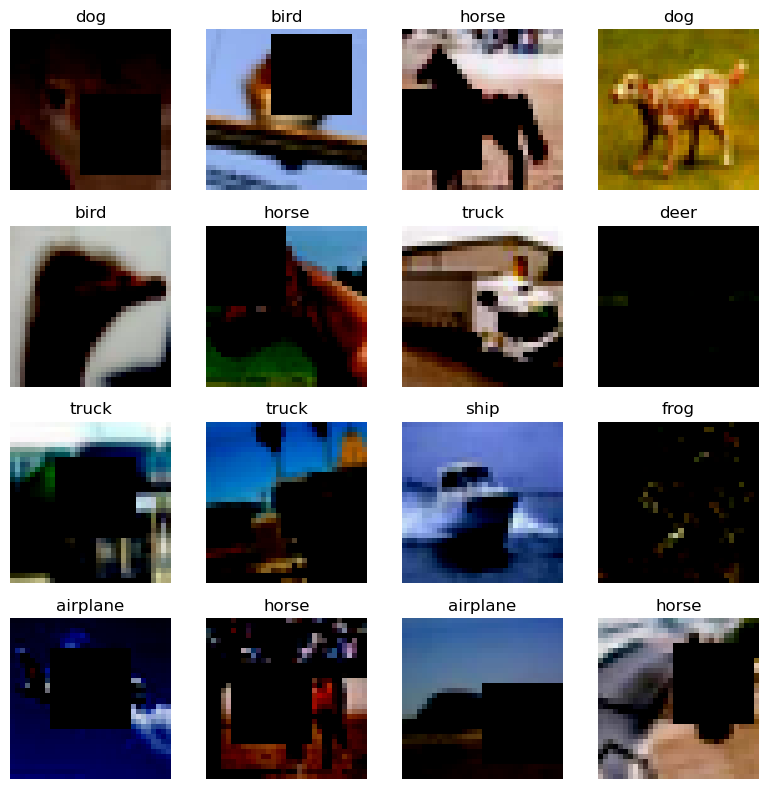

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Function to display a grid of images
def show_images(dataset, num_images=16):
    fig, axes = plt.subplots(4, 4, figsize=(8, 8))
    axes = axes.ravel()
    for i in range(num_images):
        index = np.random.randint(0, len(dataset))
        image, label = dataset[index]
        axes[i].imshow(np.transpose(image.numpy(), (1, 2, 0)))  # Convert from Tensor to NumPy
        axes[i].set_title(dataset.classes[label])
        axes[i].axis('off')
    plt.tight_layout()
    plt.show()

# Display sample training images
show_images(train)

In [ ]:
image, label = train[0]
print(f"Image Shape: {image.shape}")
print(f"Label : {label} ({train.classes[label]})")

Image Shape: torch.Size([3, 32, 32])
Label : 6 (frog)


In [ ]:
from collections import Counter

labels = [label for _, label in train]
class_counts = Counter(labels)
print(class_counts)
class_counts.items()
for cls, count in class_counts.items():
    print(f"{train.classes[cls]} : {count}")

Counter({6: 5000, 9: 5000, 4: 5000, 1: 5000, 2: 5000, 7: 5000, 8: 5000, 3: 5000, 5: 5000, 0: 5000})
frog : 5000
truck : 5000
deer : 5000
automobile : 5000
bird : 5000
horse : 5000
ship : 5000
cat : 5000
dog : 5000
airplane : 5000


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


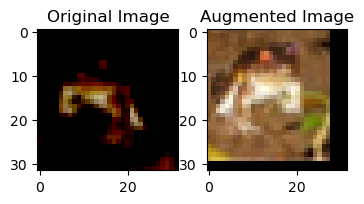

In [ ]:
transform_augment = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomCrop(32, padding=4),
    transforms.ToTensor()
])

# Apply augmentation to a sample image
augment_dataset = datasets.CIFAR10(root='./data', train=True, transform=transform_augment)
aug_image, _ = augment_dataset[0]

# Display original and augmented images
fig, ax = plt.subplots(1, 2, figsize=(4, 2))
ax[0].imshow(np.transpose(image.numpy(), (1, 2, 0)))
ax[0].set_title("Original Image")
ax[1].imshow(np.transpose(aug_image.numpy(), (1, 2, 0)))
ax[1].set_title("Augmented Image")
plt.show()


In [ ]:
print("Dataset statistics")
print("Shape : ", train.data.shape)
print("min : ", train.data.min().item())
print("max :", train.data.max().item())
print("mean: ", train.data.mean())
print("variance : ", train.data.std())
print("variance : ", train.data.var())


Dataset statistics
Shape :  (50000, 32, 32, 3)
min :  0
max : 255
mean:  120.70756512369792
variance :  64.1500758911213
variance :  4115.232236836622


In [18]:
dropout_value = 0.1
# CNN Model
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()

        self.convblock1 = nn.Sequential(
            #input size : 3x32x32
            # Block - 1, Layer - 1
            nn.Conv2d(in_channels=3, out_channels=16, kernel_size=(3, 3), stride=1, padding=1, bias=False),
            nn.BatchNorm2d(16),
            nn.ReLU(), # ouptput: 32, RF: 3
            nn.Dropout(dropout_value),

             # #Layer - 3
            nn.Conv2d(in_channels=16, out_channels=32, kernel_size=(3, 3), stride=1, padding=1, bias=False),
            nn.BatchNorm2d(32),
            nn.ReLU(), # output: 32, RF: 7
            nn.Dropout(dropout_value),

            # Layer 2 - depthwise separable convolution
            nn.Conv2d(in_channels=32, out_channels=32, kernel_size=(3, 3), stride=1, padding=1, groups=32),
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=(1, 1), stride=1, padding=0),
            nn.BatchNorm2d(64),
            nn.ReLU(), #output: 32, RF: 5


            # Stride-2 Convolution - downsampling
            nn.Conv2d(in_channels=64, out_channels=64, kernel_size=(3, 3), stride=2, padding=1, bias=False),
            nn.BatchNorm2d(64),
            nn.ReLU(), # output: 16, RF: 9
            nn.Dropout(dropout_value),
        )

        self.transition1 = nn.Sequential(
            nn.Conv2d(in_channels=64, out_channels=16, kernel_size=(1, 1), padding=0, bias=False),
            nn.BatchNorm2d(16),
            nn.ReLU() #output : 16, RF:9
        )
        self.convblock2 = nn.Sequential(

            #Block - 2, Layer - 1
            nn.Conv2d(in_channels=16, out_channels=32, kernel_size=(3, 3), stride=1, padding=1, bias=False),
            nn.BatchNorm2d(32),
            nn.ReLU(), #output: 16, RF: 13
            nn.Dropout(dropout_value),

            # Block - 2, Layer - 2
            nn.Conv2d(in_channels=32, out_channels=32, kernel_size=(3, 3), stride=1, padding=1, bias=False),
            nn.BatchNorm2d(32),
            nn.ReLU(), #output: 16, RF: 17
            nn.Dropout(dropout_value),

            # stride = 2 convolution downsampling
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=(3, 3), stride=2, padding=1, bias=False),
            nn.BatchNorm2d(64),
            nn.ReLU(), #output: 8, RF: 21
            nn.Dropout(dropout_value),
        )

        self.transition2 = nn.Sequential(
            nn.Conv2d(in_channels=64, out_channels=16, kernel_size=(1, 1), padding=0, bias=False),
            nn.BatchNorm2d(16),
            nn.ReLU() #output:8, RF:21
        )

        self.convblock3 = nn.Sequential(

            #Block - 3, Layer - 1

            nn.Conv2d(in_channels=16, out_channels=32, kernel_size=(3, 3), stride=1, padding=1, bias=False),
            nn.BatchNorm2d(32),
            nn.ReLU(), #output: 8, RF: 29
            nn.Dropout(dropout_value),

            # Block - 3, Layer - 2
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=(3, 3), stride=1, padding=1, bias=False),
            nn.BatchNorm2d(64),
            nn.ReLU(), #output: 8, RF: 37
            nn.Dropout(dropout_value),

             # Block - 3, Layer - 2 downsample here
            nn.Conv2d(in_channels=64, out_channels=64, kernel_size=(3, 3), stride=2, padding=1, bias=False),
            nn.BatchNorm2d(64),
            nn.ReLU(), #output: 8, RF: 37
            nn.Dropout(dropout_value),

            # # dilated convolution here
            # nn.Conv2d(in_channels=64, out_channels=64, kernel_size=(3, 3), stride=2, padding=2, dilation=2, bias=False),
            # nn.BatchNorm2d(64),
            # nn.ReLU(), #output: 8, RF: r_out = r_in + (k-1)*j_in = 37 + 4*4 = 53
            # nn.Dropout(dropout_value),

            # #Block - 3, stride-2 after dilation
            # nn.Conv2d(in_channels=64, out_channels=64, kernel_size=(3, 3), stride=2, padding=1, bias=False),

            #nn.BatchNorm2d(64),
            #nn.ReLU(), #output: 4, RF: 61
            #nn.Dropout(dropout_value),

        )

        self.transition3 = nn.Sequential(
            nn.Conv2d(in_channels=64, out_channels=16, kernel_size=(1, 1), padding=0, bias=False),
            nn.BatchNorm2d(16),
            nn.ReLU()
        )

        self.convblock4 = nn.Sequential(

            #Block - 4, Layer dilation
            nn.Conv2d(in_channels=16, out_channels=64, kernel_size=(3, 3), stride=1, padding=2, dilation=2, bias=False),
            nn.BatchNorm2d(64),
            nn.ReLU(), #output: 4, RF: 59
        )

        self.outputblock = nn.Sequential(
            nn.AdaptiveAvgPool2d(1),
            #nn.AvgPool2d(kernel_size=4),
            nn.Conv2d(in_channels=64, out_channels=10, kernel_size=(1, 1), padding=0, bias=False)
        )



    def forward(self, x):
        x = self.convblock1(x)
        x = self.transition1(x)
        x = self.convblock2(x)
        x = self.transition2(x)
        x = self.convblock3(x)
        x = self.transition3(x)
        x = self.convblock4(x)
        x = self.outputblock(x)
        x = x.view(-1, 10)
        return x


In [19]:
from torchsummary import summary
use_cuda = torch.cuda.is_available()
cuda = torch.device("cuda" if use_cuda else "cpu")
print(cuda)
model = Net().to(cuda)
summary(model, input_size=(3, 32, 32))

cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 32, 32]             432
       BatchNorm2d-2           [-1, 16, 32, 32]              32
              ReLU-3           [-1, 16, 32, 32]               0
           Dropout-4           [-1, 16, 32, 32]               0
            Conv2d-5           [-1, 32, 32, 32]           4,608
       BatchNorm2d-6           [-1, 32, 32, 32]              64
              ReLU-7           [-1, 32, 32, 32]               0
           Dropout-8           [-1, 32, 32, 32]               0
            Conv2d-9           [-1, 32, 32, 32]             320
           Conv2d-10           [-1, 64, 32, 32]           2,112
      BatchNorm2d-11           [-1, 64, 32, 32]             128
             ReLU-12           [-1, 64, 32, 32]               0
           Conv2d-13           [-1, 64, 16, 16]          36,864
      BatchNorm2d-14           [-1

In [23]:
from tqdm import tqdm

train_losses = []
test_losses = []
train_acc = []
test_acc = []

def train(model, device, train_loader, optimizer, epoch):
  model.train()
  pbar = tqdm(train_loader)
  correct = 0
  processed = 0
  for batch_idx, (data, target) in enumerate(pbar):
    # get samples
    data, target = data.to(device), target.to(device)

    # Init
    optimizer.zero_grad()
    # In PyTorch, we need to set the gradients to zero before starting to do backpropragation because PyTorch accumulates the gradients on subsequent backward passes.
    # Because of this, when you start your training loop, ideally you should zero out the gradients so that you do the parameter update correctly.

    # Predict
    y_pred = model(data)

    # Calculate loss
    criterion = nn.CrossEntropyLoss()
    loss = criterion(y_pred, target)
    #loss = F.nll_loss(y_pred, target)
    train_losses.append(loss)

    # Backpropagation
    loss.backward()
    optimizer.step()

    # Update pbar-tqdm

    pred = y_pred.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
    correct += pred.eq(target.view_as(pred)).sum().item()
    processed += len(data)

    pbar.set_description(desc= f'Loss={loss.item()} Batch_id={batch_idx} Accuracy={100*correct/processed:0.2f}')
    train_acc.append(100*correct/processed)

def test(model, device, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    criterion = nn.CrossEntropyLoss(reduction='sum')

    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += criterion(output, target).item()
            #test_loss += F.nll_loss(output, target, reduction='sum').item()  # sum up batch loss
            pred = output.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)
    test_losses.append(test_loss)

    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.2f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))

    test_acc.append(100. * correct / len(test_loader.dataset))

In [ ]:
from torch.optim.lr_scheduler import StepLR

print("model running on: ", device)
log_table = PrettyTable()
log_table.field_names = ["Epoch", "Training Accuracy", "Test Accuracy", "Diff", "Training Loss", "Test Loss"]

model =  Net().to(device)
#optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
optimizer = optim.Adam(model.parameters(), lr=0.004)
scheduler = StepLR(optimizer, step_size=10, gamma=0.1)

EPOCHS = 30
for epoch in range(EPOCHS):
    print("EPOCH:", epoch+1)
    train(model, device, train_loader, optimizer, epoch)
    #scheduler.step()
    test(model, device, test_loader)
    log_table.add_row([epoch+1, f"{train_acc[-1]:.2f}%", f"{test_acc[-1]:.2f}%", f"{float(train_acc[-1]) - float(test_acc[-1]):.2f}" ,f"{train_losses[-1]:.4f}", f"{test_losses[-1]:.4f}"])
print(log_table)

model running on:  cuda
EPOCH: 1


Loss=1.7548264265060425 Batch_id=71 Accuracy=27.93:  18%|█▊        | 71/391 [00:02<00:12, 26.35it/s]